# <font color='blue'> Linear Regression in R </font>


In [13]:
data1 = read.table('http://www.randomservices.org/random/data/Challenger2.txt',header = TRUE)
attach(data1) # to be able to use the labels

The following objects are masked from data1 (pos = 3):

    I, T


The following objects are masked from data1 (pos = 4):

    I, T


The following object is masked from package:base:

    T




In [11]:
head(data1)

,T,I
,<int>,<int>
1,53,11
2,57,4
3,58,4
4,63,2
5,66,0
6,67,0


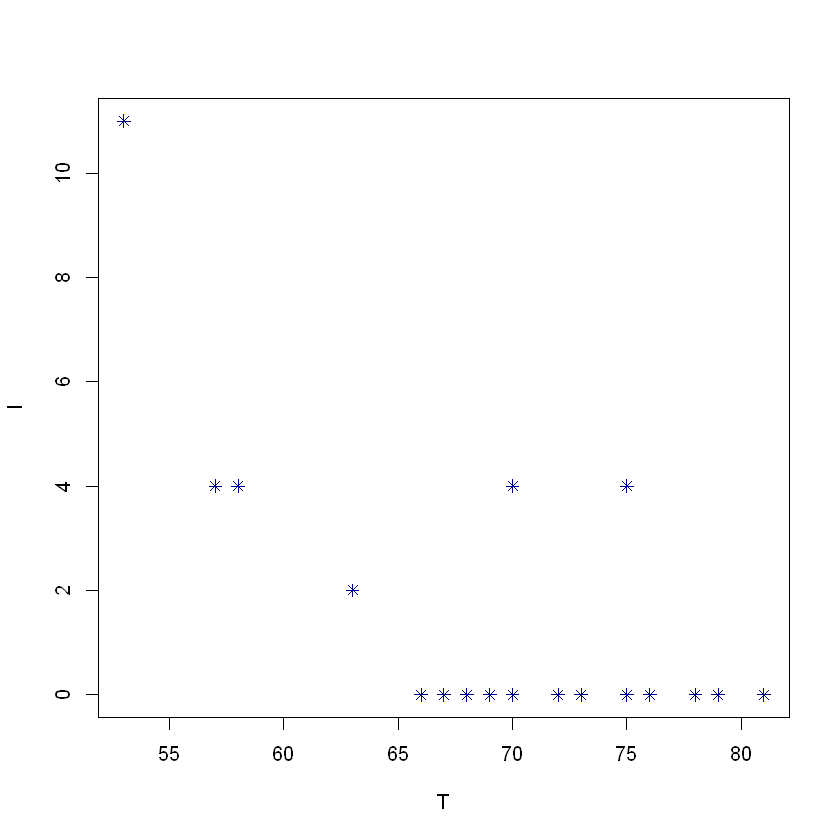

In [21]:
plot(T,I,col='darkblue',pch=8)

In [22]:
data1.lm = lm(I~T)

In [23]:
summary(data1.lm)


Call:
lm(formula = I ~ T)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3025 -1.4507 -0.4928  0.7397  5.5337 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.36508    4.43859   4.138 0.000468 ***
T           -0.24337    0.06349  -3.833 0.000968 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.102 on 21 degrees of freedom
Multiple R-squared:  0.4116,	Adjusted R-squared:  0.3836 
F-statistic: 14.69 on 1 and 21 DF,  p-value: 0.0009677


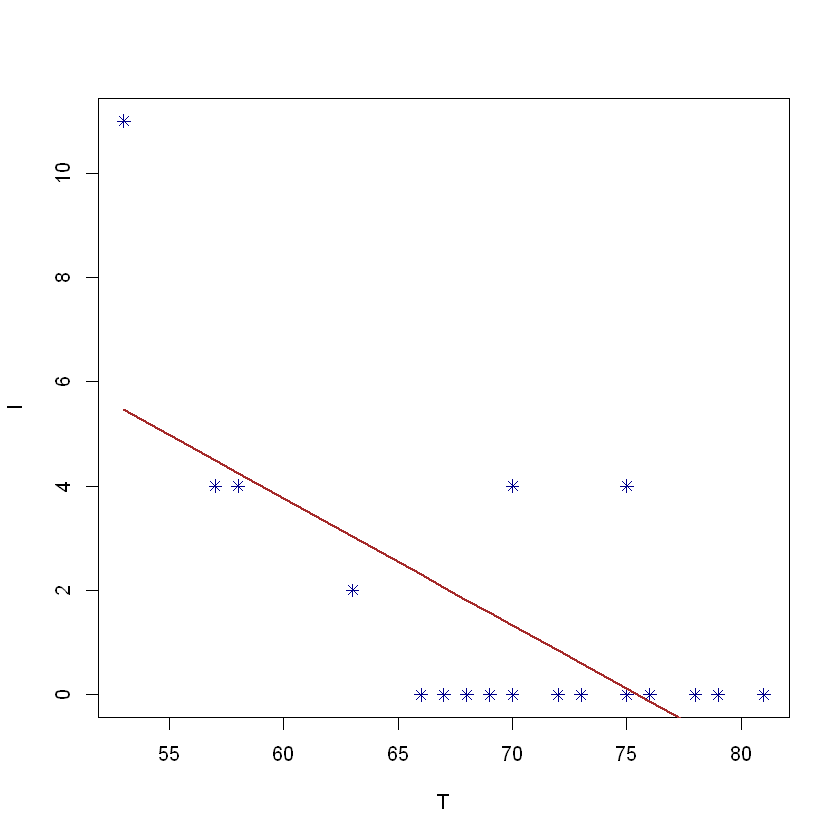

In [32]:
plot(T,I,col='darkblue',pch=8)
lines(T,fitted(data1.lm),col='brown',lwd=2)

In [33]:
# 95% posterior interval for the slope
-0.24337 - 0.06349*qt(.975,21)
-0.24337 + 0.06349*qt(.975,21)
# note that these are the same as the frequentist confidence intervals

[1] -0.3754047

[1] -0.1113353

In [34]:
# the Challenger launch was at 31 degrees Fahrenheit
# how much o-ring damage would we predict?
# y-hat

18.36508-0.24337*31

[1] 10.82061

In [36]:
coef(data1.lm)
coef(data1.lm)[1] + coef(data1.lm)[2]*31  


(Intercept)           T 
  18.365079   -0.243373

(Intercept) 
   10.82052

In [2]:
# posterior prediction interval (same as frequentist)
predict(oring.lm,data.frame(T=31),interval="predict")  
10.82052-2.102*qt(.975,21)*sqrt(1+1/23+((31-mean(T))^2/22/var(T)))

# posterior probability that damage index is greater than zero
1-pt((0-10.82052)/(2.102*sqrt(1+1/23+((31-mean(T))^2/22/var(T)))),21)




ERROR: Error in predict(oring.lm, data.frame(T = 31), interval = "predict"): object 'oring.lm' not found


In [4]:
#http://www.randomservices.org/random/data/Galton.txt
# Galton's seminal data on predicting the height of children from the 
# heights of the parents, all in inches

heights=read.table('http://www.randomservices.org/random/data/Galton.txt',header=T)
attach(heights)
names(heights)


The following objects are masked from heights (pos = 3):

    Family, Father, Gender, Height, Kids, Mother




[1] "Family" "Father" "Mother" "Gender" "Height" "Kids"

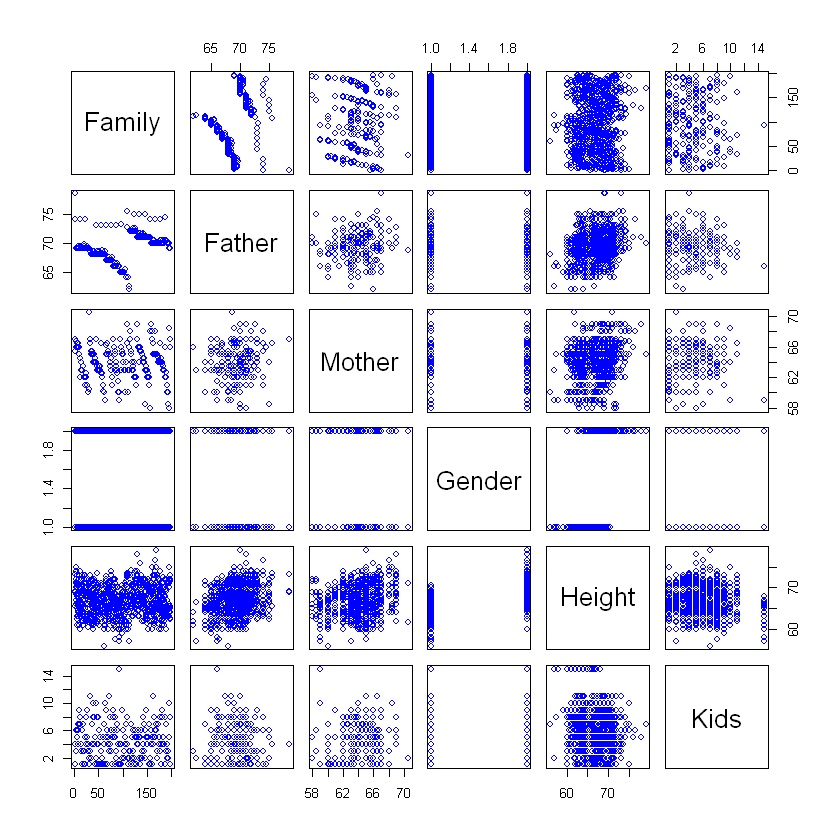

In [10]:
pairs(heights,col='blue')


In [6]:

summary(lm(Height~Father+Mother+Gender+Kids))
summary(lm(Height~Father+Mother+Gender))
heights.lm=lm(Height~Father+Mother+Gender)



Call:
lm(formula = Height ~ Father + Mother + Gender + Kids)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4748 -1.4500  0.0889  1.4716  9.1656 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.18771    2.79387   5.794 9.52e-09 ***
Father       0.39831    0.02957  13.472  < 2e-16 ***
Mother       0.32096    0.03126  10.269  < 2e-16 ***
GenderM      5.20995    0.14422  36.125  < 2e-16 ***
Kids        -0.04382    0.02718  -1.612    0.107    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.152 on 893 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6391 
F-statistic: 398.1 on 4 and 893 DF,  p-value: < 2.2e-16



Call:
lm(formula = Height ~ Father + Mother + Gender)

Residuals:
   Min     1Q Median     3Q    Max 
-9.523 -1.440  0.117  1.473  9.114 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15.34476    2.74696   5.586 3.08e-08 ***
Father       0.40598    0.02921  13.900  < 2e-16 ***
Mother       0.32150    0.03128  10.277  < 2e-16 ***
GenderM      5.22595    0.14401  36.289  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.154 on 894 degrees of freedom
Multiple R-squared:  0.6397,	Adjusted R-squared:  0.6385 
F-statistic:   529 on 3 and 894 DF,  p-value: < 2.2e-16


In [12]:
# each extra inch taller a father is is correlated with 0.4 inch extra
 # height in the child
# each extra inch taller a mother is is correlated with 0.3 inch extra
  #height in the child
# a male child is on average 5.2 inches taller than a female child
# 95% posterior interval for the the difference in height by gender
5.226 - 0.144*qt(.975,894)
5.226 + 0.144*qt(.975,894)

# posterior prediction interval (same as frequentist)
predict(heights.lm,data.frame(Father=68,Mother=64,Gender="M"),interval="predict")
predict(heights.lm,data.frame(Father=68,Mother=64,Gender="F"),interval="predict")


[1] 4.943383

[1] 5.508617

,fit,lwr,upr
1,68.75291,64.51971,72.9861


,fit,lwr,upr
1,63.52695,59.29329,67.76062
